# Undersök förloppet av en funktion

I denna Notebook finns ett flertal exempel på hur man kan visualisera funktioner och deras egenskaper. Börja altid med att köra kodcellen, och därefter kan du undersöka funktionen med olika *sliders*. Koden innehåller förklarande kommentarer, så du kan undersöka den på egen hand och ta modell av den för att göra din egen, eller bara pröva dig fram genom att göra ändringar här.


**Obs!** Om du kör en annan kodcell, och sedan går tillbaka och försöker använda någon tidigare *slider*, kan det hända att det inte fungerar. Därför bör du alltid köra rätt kodcell innan du börjar göra inställningar.

## Andragradsekvation

Här ska vi testa på verktyg som låter oss skapa en interaktiv graf där vi kan använda sliders för att ändra parametrarna.
Funktionen som används i detta exempel är en andragradsfunktion, $y=ax^2+bx+c$, men du kan också byta ut andragradsfunktionen till något annat, till exempel exponentialfunktionen $a \cdot b^{c\cdot x}$ om du byter ut funktionen mot ````a*b**(c*x)````.

In [8]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Vi definierar en andragradsfunktion
def andragrads(x, a, b, c):
    return a*x**2+b*x+c



# Vi bestämmer gränserna
xmin = -5
xmax = 5
ymin = -2
ymax = 5
tickstep = 1

# Vi definierar en funktion som uppdaterar funktionen när vi ändrar parametrarna a, b och c.
def update1(a, b, c):
    fig = plt.figure(figsize=(12,8))
    plt.title(r'$f(x)=ax^2+bx+c$',fontsize=20) # Grafens titel. $$-tecknen avgränsar LaTeX-kod.
    x = np.linspace(xmin, xmax, num=1000) # Vi definierar gränserna och väljer antalet punkter i intervallet.
    plt.plot(x, andragrads(x,a,b,c), lw=2.5) # Vi ritar andragradsfunktionen
    
    # Vi bestämmer axlarnas egenskaper
    ax = fig.gca() # Först skapar vi axlarna
    ax.set_ylim(ymin, ymax) # y-axelns gränser
    ax.set_xlim(xmin, xmax) # x-axelns gränser
    ax.set_xticks(np.arange(xmin, xmax+tickstep, tickstep)) # x-axelns markeringar
    ax.set_yticks(np.arange(ymin, ymax+tickstep, tickstep)) # y-axelns markeringar
    ax.axhline(y=0, color='k') # Förtydligar x-axeln (y=0)
    ax.axvline(x=0, color='k') # Förtydligar y-axeln (x=0)
    plt.grid() # Rutsystem
    
    # Axlarnas rubriker
    plt.xlabel("x",fontsize=20)
    plt.ylabel("y",fontsize=20)
    
    # Slutligen ritas figuren
    plt.show()

# När dessa funktioner; andragrads(x, a, b, c) och update1(a, b, c) är definierade,
# skriver vi en kort kod som låter oss använda sliders för att göra en interaktiv graf.
interactive_plot = interactive(update1, a=(-2, 4, 0.05), b=(-5, 5, 0.2), c=(-5, 5, 0.2))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='a', max=4.0, min=-2.0, step=0.05), FloatSlider(value…

## Derivatan och tangentens riktningskoefficient

Här använder vi samma verktyg som tidigare för att rita ut tangenten till en funktion, genom en punkt vars x-koordinat kan väljas med en slider. 

Disclaimer: Denna kod deriverar inte funktionen. Vi har skrivit in funktionens derivatafunktion i koden.

In [6]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Vi vill undersöka sinusfunktionen. Vi namnger funktionen "f". Sinusfunktionen finns tillgänglig i numpy-paketet.
def f(x):
    return np.sin(x)
    
# Derivatan för sinus är cosinus. Vi namnger den "df".
def df(x):
    return np.cos(x)

# Vi bestämmer gränser och skalor.
xmin = -2*np.pi
xmax = 2*np.pi
step = np.pi/8
ymin = -2
ymax = 2
tickstep = np.pi/2

# Vi definierar en funktion som ritar en tangent till grafen i punkten x, som kan väljas med en slider.
def update2(x):
    fig = plt.figure(figsize=(12,8))
    punkter = np.linspace(xmin, xmax, num=1000) # Val av intervall och antal punkter.
    plt.plot(punkter, f(punkter), 'b-', lw=2.5) # Sinusfunktionen ritas ut med en blå kurva.
    plt.plot(punkter, df(x)*punkter+f(x)-df(x)*x, 'r--') # Tangenten ritas som en röd, streckad linje.
    plt.plot(x, f(x), 'ko') # Tangeringspunkten markeras som en svart prick
    plt.text(x, f(x)+0.1, r'$k={:.4f}$'.format(df(x)), fontsize=20) # riktningskoefficienten skrivs ut.
    plt.text(xmin+4/3*step,3/4*ymax,r'$f(x)=sin(x)$',color='b',fontsize=20) # funktionen skrivs ut.
    
    # Vi bestämmer axlarnas egenskaper
    ax = fig.gca() # Först skapar vi axlarna
    ax.set_ylim(ymin, ymax) # y-axelns gränser
    ax.set_xlim(xmin, xmax) # x-axelns gränser
    ax.set_xticks(np.arange(xmin,xmax+step,tickstep)) # x-axelns markeringar
    # x-värden skrivs ut vid markeringarna
    ax.set_xticklabels([r"$-2\pi$",r'$-\frac{%s}{%s}$'%("3\pi",2),r"$-\pi$",r'$-\frac{%s}{%s}$'%("\pi",2),"0",r'$\frac{%s}{%s}$'%("\pi",2),r"$\pi$",r'$\frac{%s}{%s}$'%("3\pi",2),r"$2\pi$"])
    ax.set_yticks(np.arange(ymin, ymax+1, 1)) # y-axelns markeringar
    ax.xaxis.set_tick_params(labelsize=16) # x-axelns fontstorlek
    ax.yaxis.set_tick_params(labelsize=16) # y-axelns fontstorlek
    ax.axhline(y=0, color='k') # Förtydligar x-axeln (y=0)
    ax.axvline(x=0, color='k') # Förtydligar y-axeln (x=0)
    plt.grid() # Rutsystem
    
    # Axlarnas rubriker
    plt.xlabel("x",fontsize=20)
    plt.ylabel("y",fontsize=20)
    
    # Slutligen ritas figuren
    plt.show()

# Vi gör en interaktiv graf, där x-värdet kan justeras med en slider.
interactive_plot = interactive(update2, x=(xmin,xmax,step))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x', max=6.283185307179586, min=-6.283185307179586, s…

## Funktionens nollställen

Vi ska läsa ut en funktions nollställen och pricka in dem på en graf. I Python finns paketet **SymPy**, som hjälper oss med symbolräkning. SymPy kommer till nytta i denna uppgift.

In [11]:
from sympy import Symbol
from sympy.solvers import solve
import matplotlib.pyplot as plt
import numpy as np

# Vi definierar funktionen som ska undersökas
def f(x):
    return x**3-2*x**2-x

# Vi tar symbolen x i bruk
x = Symbol('x')

# Vi löser ut funktionens rötter med solve-verktyget.
roots = solve(f(x), x)

# Vi skriver ut de rötter som hittades.
print(roots)

[0, 1 - sqrt(2), 1 + sqrt(2)]


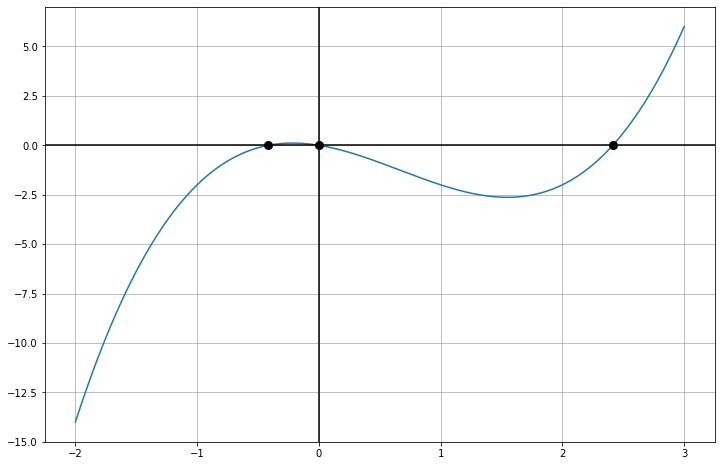

In [10]:
# Vi skapar en graf, och märker ut rötterna. 

punkter = np.linspace(-2,3,num=1000) # Vi bestämmer intervall och antal punkter
fig = plt.figure(figsize=(12,8)) # Vi skapar figuren

plt.plot(punkter,f(punkter)) # Vi ritar funktionen i det bestämda intervallet

# Vi gör en for-loop som tar alla värden ur listan med nollställen och ritar ut punkterna.
for root in roots:
    plt.plot(root, f(root), 'ko', markersize=8)

# Vi bestämmer axlarnas egenskaper
ax = fig.gca() # Först skapar vi axlarna
ax.axhline(y=0, color='k') # Förtydligar x-axeln (y=0)
ax.axvline(x=0, color='k') # Förtydligar y-axeln (x=0)
plt.grid() # Rutsystem

# Slutligen visar vi grafen
plt.show()